# Position of a Quasar

### Work in progress!!!

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [14]:
mu = 1
N = 7
sigma = 0.2
x_axis = np.linspace(0, 2, 1000)

### 1. Homoscedastic Gaussians

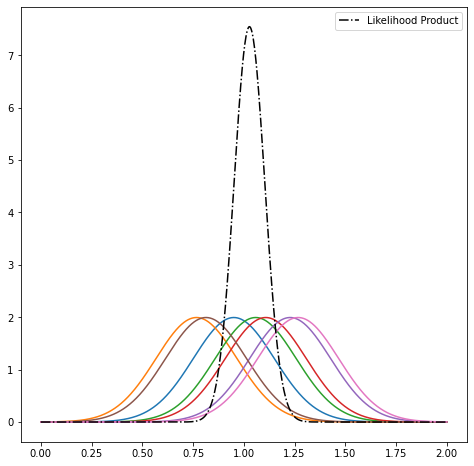

In [15]:
distrib = []
fig, ax = plt.subplots(figsize=(8, 8))


positions = norm(mu, sigma).rvs(N)

for i in range(N):
    temporary = norm(positions[i], sigma)
    distrib.append(temporary.pdf(x_axis))
    plt.plot(x_axis, temporary.pdf(x_axis))

distrib = np.array(distrib)
likelihood = np.prod(distrib, axis=0)

plt.plot(x_axis, likelihood, c='black', ls='dashdot', label='Likelihood Product')
plt.legend()
plt.show()

In [127]:
sorted = np.argsort(likelihood)

MLx = x_axis[sorted[-1]]      #Likelihood is maximized at the last (-1) index, while minimized at the first (0)
sample_mean = np.mean(positions)

print('Likelihood is maximized at {:4f}'.format(MLx))
print('The Maximum likelihood estimator is the sample mean and is {:4f}'.format(sample_mean))


Likelihood is maximized at 1.009009
The Maximum likelihood estimator is the sample mean and is 1.009904


### 2. Heteroscedastic Gaussians

#np.random.seed(2)

sigma_heteroscedastic = norm(0.2, 0.05).rvs(N)
positions = norm(mu, sigma).rvs(N)

print(positions)

distrib = []

for i in range(N):
    temporary = norm(positions[i], sigma_heteroscedastic[i])
    distrib.append(temporary.pdf(x_axis))
    plt.plot(x_axis, temporary.pdf(x_axis))

distrib = np.array(distrib)
likelihood = np.prod(distrib, axis=0)

plt.plot(x_axis, likelihood, c='black', ls='dashdot', label='Likelihood Product')
plt.legend()
plt.show()

[1.09352787 0.9614297  1.15439064 1.2688548  0.94681721]
(5, 1000)


Text(0.5, 1.0, 'MLE for Gaussian Distribution')

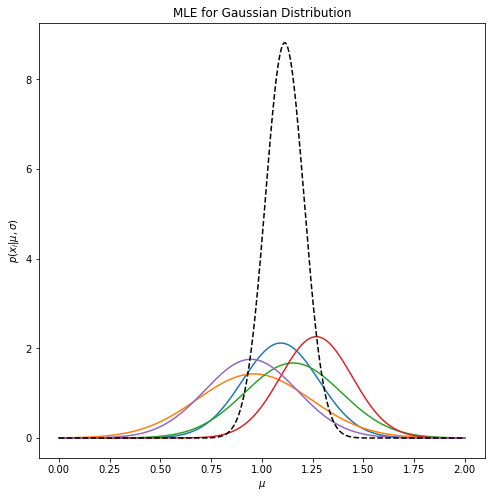

In [31]:
N = 5
mu = 1
sigma = norm(0.2,0.05).rvs(N)
np.random.seed(42) # If you don't understand why 42, take a crash course in pop culture!
sample = np.concatenate([norm(mu,s).rvs(1) for s in sigma])
print(sample)

xgrid = np.linspace(0,2,1000)


Ls = np.array([norm.pdf(xgrid,loc=s,scale=ss) for s,ss in zip(sample,sigma)])

print(Ls.shape)

L = np.prod(Ls,axis=0)

fig, ax = plt.subplots(figsize=(8, 8))
                       
                       
for thisL in Ls:
    plt.plot(xgrid, thisL, ls='-')
    
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')